In [2]:
import pandas as pd
import numpy as np 

In [3]:
df=pd.read_csv('1472197.csv').drop(['TAVG','STATION'],axis=1).set_index('DATE')
df_BURBANK=df[df['NAME']=='BURBANK GLENDALE PASADENA AIRPORT, CA US']
df_HAYWARD=df[df['NAME']=='HAYWARD AIR TERMINAL, CA US']


In [4]:
df_BUR_HAY=df_BURBANK.merge(df_HAYWARD,how='outer', left_index=True, right_index=True)
df_BUR_HAY.index=pd.to_datetime(df_BUR_HAY.index)
df_BUR_HAY['YEAR']=df_BUR_HAY.index.year
df_BUR_HAY['MONTH']=df_BUR_HAY.index.month

In [6]:
df_BUR_HAY.groupby(['MONTH','YEAR']).mean()

TMAX_x     TMIN_x     TMAX_y     TMIN_y
MONTH YEAR                                            
1     2008  62.322581  42.806452  54.612903  41.903226
      2009  72.032258  47.322581  61.387097  41.677419
      2010  67.322581  46.096774  57.451613  45.387097
      2011  69.000000  44.483871  59.419355  42.580645
      2012  71.000000  45.096774  59.161290  41.000000
      2013  66.419355  42.161290  56.741935  38.064516
      2014  77.741935  49.967742  64.000000  42.612903
      2015  71.548387  47.451613  62.064516  43.806452
      2016  64.774194  45.258065  59.096774  47.225806
      2017  62.258065  44.935484  56.967742  43.419355
      2018  73.322581  49.322581  60.483871  45.774194
2     2008  66.107143  43.285714  59.827586  43.172414
      2009  65.285714  45.071429  59.428571  45.035714
      2010  66.035714  45.714286  60.535714  47.785714
      2011  63.642857  41.785714  60.000000  41.785714
      2012  67.285714  44.821429  61.172414  43.448276
      2013  68.535714  44.500000  59.857143  40.821429
      2014  72.785714  50.357143  60.642857  46.357143
      2015  74.214286  50.178571  66.464286  49.321429
      2016  77.896552  49.068966  67.344828  46.793103
      2017  64.321429  48.750000  61.142857  47.857143
      2018  69.464286  45.892857  64.107143  42.250000
3     2008  73.225806  49.000000  62.290323  44.193548
      2009  69.096774  48.032258  62.290323  46.516129
      2010  70.806452  48.548387  63.419355  45.645161
      2011  68.806452  48.096774  61.774194  47.096774
      2012  67.096774  46.451613  60.645161  45.129032
      2013  75.258065  52.838710  65.387097  46.516129
      2014  73.032258  51.967742  66.451613  48.354839
      2015  79.806452  54.903226  71.225806  51.548387
...               ...        ...        ...        ...
10    2008  85.806452  58.258065  75.000000  53.129032
      2009  77.451613  55.419355  70.096774  53.548387
      2010  75.129032  57.580645  71.483871  54.774194
      2011  80.129032  55.516129  72.548387  55.064516
      2012  82.064516  58.612903  72.451613  55.064516
      2013  80.161290  55.967742  69.285714  49.153846
      2014  83.838710  59.387097  76.870968  55.193548
      2015  87.000000  65.483871  75.870968  56.580645
      2016  80.677419  58.032258  72.258065  55.483871
      2017  85.483871  59.548387  76.064516  52.161290
11    2008  76.633333  52.200000  65.833333  50.366667
      2009  75.066667  48.533333  64.666667  45.300000
      2010  71.566667  47.866667  64.600000  45.933333
      2011  68.566667  46.933333  60.592593  44.888889
      2012  73.066667  51.000000  65.700000  49.200000
      2013  75.966667  52.933333  65.533333  47.034483
      2014  76.166667  52.533333  65.833333  48.500000
      2015  72.133333  46.900000  62.800000  44.266667
      2016  76.533333  51.200000  65.900000  50.333333
      2017  77.266667  53.966667  65.466667  50.033333
12    2008  63.290323  42.838710  55.774194  40.645161
      2009  63.258065  43.645161  56.806452  42.290323
      2010  65.935484  47.064516  59.161290  47.064516
      2011  65.451613  41.032258  58.580645  39.161290
      2012  62.516129  45.580645  57.774194  43.419355
      2013  71.935484  45.032258  58.827586  37.241379
      2014  66.290323  47.935484  63.064516  49.580645
      2015  65.483871  42.419355  57.290323  41.741935
      2016  64.709677  45.774194  58.483871  42.451613
      2017  76.103448  46.967742  61.516129  40.709677

[129 rows x 4 columns]

In [7]:
df_reqd_year=df_BUR_HAY[(df_BUR_HAY['YEAR']==2008)|(df_BUR_HAY['YEAR']==2017)]


In [10]:
df_final = pd.DataFrame()
df_reqd_year=df_reqd_year.groupby(['YEAR','MONTH']).mean()
for i in df_reqd_year.index.get_level_values('MONTH').unique():
    values_LA=round((((df_reqd_year.loc[2017].loc[i]['TMAX_x']-df_reqd_year.loc[2008].loc[i]['TMAX_x'])/df_reqd_year.loc[2008].loc[i]['TMAX_x'])*100),2)
    values_SFO=round(((df_reqd_year.loc[2017].loc[i]['TMAX_y']-df_reqd_year.loc[2008].loc[i]['TMAX_y'])/df_reqd_year.loc[2008].loc[i]['TMAX_y'])*100,2)  
    temp_df = pd.DataFrame({'City':'LA','Month':int(i),'Percentage change':values_LA},index=[i])
    #print(temp_df)
    #df_final.append([df_final,temp_df],ignore_index=True)
    temp2 = pd.DataFrame({'City':'SFO','Month':int(i),'Percentage change':values_SFO},index=[i])
    temp2 = pd.DataFrame.append(temp2,temp_df)
    #print(temp2)
    df_final = pd.DataFrame.append(df_final,temp2)

In [11]:
import calendar
calendar.month_abbr[1]

'Jan'

In [12]:
df_final_LA=df_final[df_final['City']=='LA']
df_final_LA
df_final_SFO=df_final[df_final['City']=='SFO']

In [13]:
months={1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUN',7:'JUL',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'}
df_final_LA['Month']=df_final_LA['Month'].replace(months)
df_final_SFO['Month']=df_final_SFO['Month'].replace(months)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
Months = ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

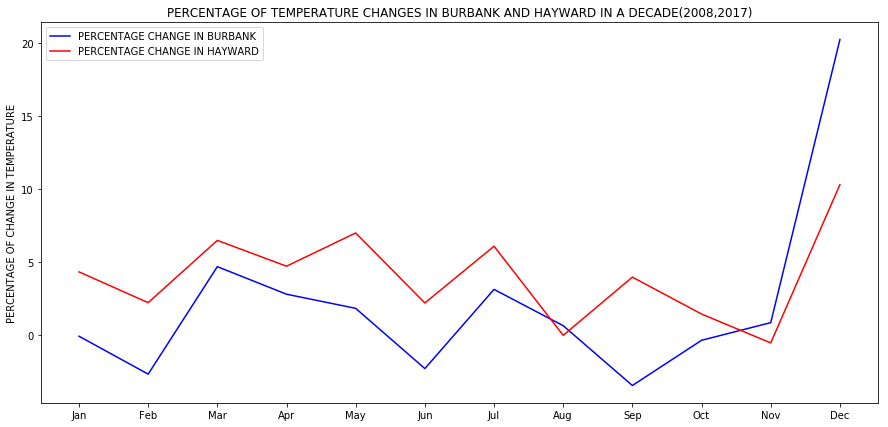

In [17]:
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks(range(len(Months)), Months )
ax.plot(df_final_LA.index,df_final_LA['Percentage change'],label='PERCENTAGE CHANGE IN BURBANK',color='b')
ax.plot(df_final_SFO.index,df_final_SFO['Percentage change'],label='PERCENTAGE CHANGE IN HAYWARD',color='r')
plt.title('PERCENTAGE OF TEMPERATURE CHANGES IN BURBANK AND HAYWARD IN A DECADE(2008,2017)')
plt.ylabel('PERCENTAGE OF CHANGE IN TEMPERATURE')
plt.legend()

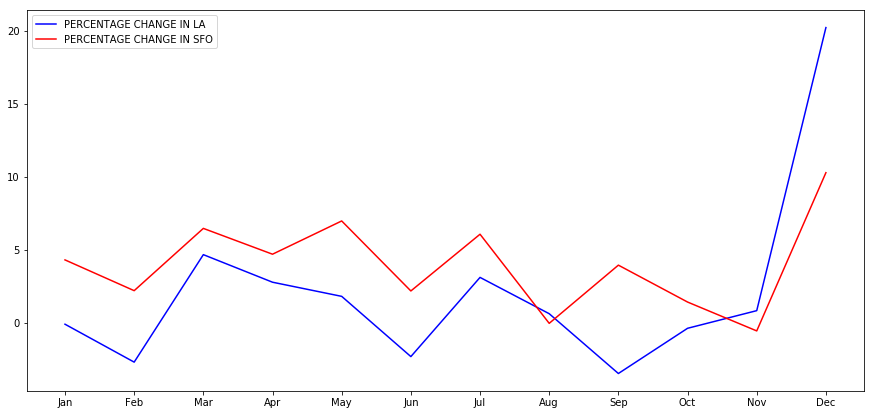

# 